In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Présentation

Networkx est un package Python très utilisé (dans SageMath par exemple) pour créer et manipuler des networks de data structures (graphs, arbres etc.).

# Création de graph

In [2]:
# instanciation du graph
Graph = nx.Graph()

# ajout des nodes
Graph.add_node(1)
Graph.add_nodes_from([2, 3, 4, 5, 6, 7, 8, 9, 10])

Graph.number_of_nodes()

10

In [3]:
# ajout des edges (liens entre les nodes)
Graph.add_edge(1, 2)
Graph.add_edges_from([
                      (5, 3), (4, 6), (4, 2), (10, 7), (7, 8), (9, 8), (8, 5), (10, 1), (5, 6), (3, 1),
                      (9, 4, {"weight": 5}), (10, 2, {"weight": 10}) # on peut aussi spécifier un poids
                     ])

Graph.number_of_edges()

13

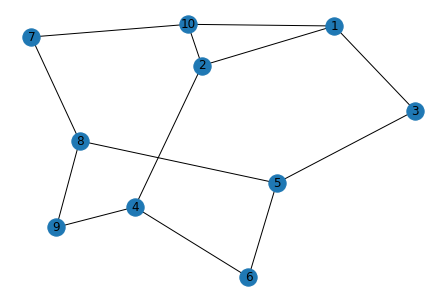

In [4]:
nx.draw(Graph, with_labels=True)

# Génération de graphs

NetworkX nous met également à disposition une (très) grande suite de fonction pour nous générer directement nos data structures.

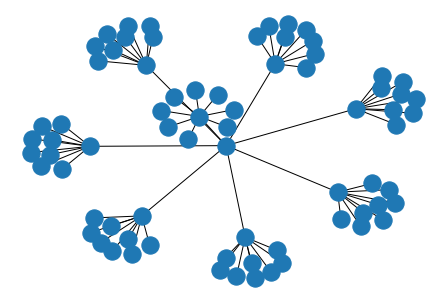

In [5]:
octree = nx.balanced_tree(8, 2) # un octree (8 nodes enfants par parent) de 2 de profondeur
nx.draw(octree)

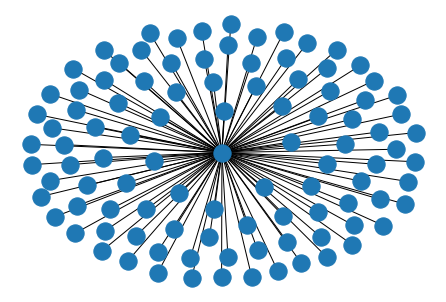

In [6]:
stargraph = nx.star_graph(100) # un graph de type étoile composé de 100 nodes
nx.draw(stargraph)

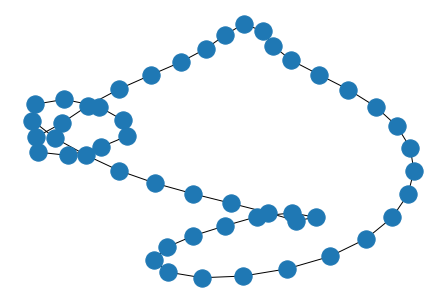

In [7]:
cyclegraph = nx.cycle_graph(50) # un graph circulaire composé de 50 nodes
nx.draw(cyclegraph)

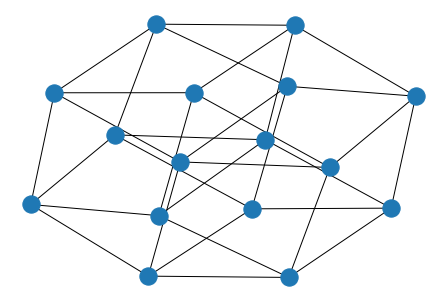

In [8]:
hypercube = nx.hypercube_graph(4) # un graph en cube en 4 dimensions
nx.draw(hypercube)

Plein d'autres graphs sont disponibles (environ une cinquantaine) pour la génération automatique !

# Algorithmes

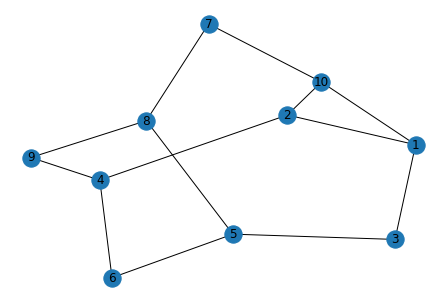

In [9]:
nx.draw(Graph, with_labels=True)

Si on reprend notre instance Graph de tout à l'heure, on peut lui appliquer différents algorithmes :

In [10]:
list(nx.all_shortest_paths(Graph, source=1, target=6))

[[1, 2, 4, 6], [1, 3, 5, 6]]

In [11]:
list(nx.dijkstra_path(Graph, source=1, target=9)) # prise en compte des poids définis plus haut

[1, 10, 7, 8, 9]

In [12]:
list(nx.astar_path(Graph, source=1, target=6))

[1, 2, 4, 6]

In [13]:
nx.wiener_index(Graph)

90.0

Plein d'algorithmes sont disponibles ! On peut notamment citer les algos de détermination d'ancêtre commun dans des graphs dirigés, les algos de recherche (Depth First Search...) etc.

# Résolution de problèmes complexes

Pour montrer toute la puissance de NetworkX, on va essayer de résoudre un problème classique de logique : a génération d'emplois du temps pour des classes étudiantes.

###### Définition des contraintes

In [14]:
classes = [
    {
        "students":  31,
        "disabled": 0,
        "courses": "ENGINEER"
    },
    {
        "students":  27,
        "disabled": 2,
        "courses": "LITTERATURE"
    },
    {
        "students":  36,
        "disabled": 1,
        "courses": "ECONOMY"
    },
    {
        "students":  33,
        "disabled": 0,
        "courses": "ECONOMY"
    },
    
    {
        "students":  33,
        "disabled": 0,
        "courses": "ENGINEER"
    }
]

In [15]:
engineer_course = {
    "MATHEMATICS": 5,
    "PHYSICS": 5,
    "ENGINEERING": 6,
    "BIOLOGY": 3,
    "ENGLISH": 2,
    "SPORTS": 2,
    "HISTORY": 2,
    "PHILOSOPHY": 2 
}

litterature_course = {
    "HISTORY": 5,
    "LITTERATURE": 5,
    "PHILOSOPHY": 6,
    "LANGUAGE HISTORY": 3,
    "ENGLISH": 5,
    "SPORTS": 2,
    "FRENCH": 2,
    "POLITICS": 3
}

economy_course = {
    "HISTORY": 5,
    "LITTERATURE": 5,
    "ECONOMY": 6,
    "PHILOSOPHY": 3,
    "ENGLISH": 2,
    "SPORTS": 2,
    "POLITICS": 5
}

In [16]:
professors = [
    {
        "name": "ANDRIL",
        "subjects": ["HISTORY", "POLITICS"]
    },
    {
        "name": "MARCEL",
        "subjects": ["MATHEMATICS"]
    },
    {
        "name": "DURAN",
        "subjects": ["PHYSICS"]
    },
    {
        "name": "DUPON",
        "subjects": ["SPORTS"]
    },
    {
        "name": "DENI",
        "subjects": ["PHILOSOPHY", "POLITICS"]
    },
    {
        "name": "PARO",
        "subjects": ["LITTERATURE"]
    },
    {
        "name": "LOPE",
        "subjects": ["PHYSICS", "ENGINEERING"]
    },
    {
        "name": "XAUR",
        "subjects": ["ENGINEERING"]
    },
    {
        "name": "PLASCE",
        "subjects": ["LITTERATURE", "LANGUAGE HISTORY"]
    },
    {
        "name": "IDIOM",
        "subjects": ["ENGLISH"]
    },
    {
        "name": "CARIGUL",
        "subjects": ["BIOLOGY"]
    },
    {
        "name": "NAIKY",
        "subjects": ["FRENCH"]      
    },
     {
        "name": "PLOKANSKI",
        "subjects": ["ECONOMY"]      
    }
]

In [45]:
classrooms = [
    {
        "id": "101",
        "possible_subjects": ["LITTERATURE", "LANGUAGE HISTORY", "HISTORY", "PHILOSOPHY", "ENGLISH", "FRENCH"],
        "can_accept_disabled": False
    },
    {
        "id": "102",
        "possible_subjects": ["LITTERATURE", "LANGUAGE HISTORY", "HISTORY", "PHILOSOPHY", "ENGLISH", "FRENCH"],
        "can_accept_disabled": True
    },
    {
        "id": "103",
        "possible_subjects": ["HISTORY", "PHILOSOPHY", "POLITICS"],
        "can_accept_disabled": True
    },
    {
        "id": "104",
        "possible_subjects": ["PHYSICS", "MATHEMATICS", "ENGINEERING"],
        "can_accept_disabled": False
    },
    {
        "id": "105",
        "possible_subjects": ["PHYSICS", "MATHEMATICS", "ENGINEERING"],
        "can_accept_disabled": True
    },
    {
        "id": "106",
        "possible_subjects": ["SPORTS"],
        "can_accept_disabled": True
    }
]

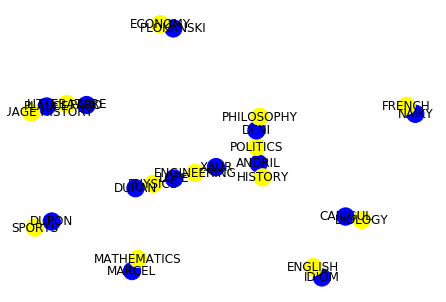

In [46]:
graph = nx.Graph()
subjects = []

for p in professors:
    graph.add_node(p.get("name"), color="blue")
    for s in p.get("subjects"):
        if s not in subjects:
            subjects.append(s)
            graph.add_node(s, color="yellow")
        graph.add_edge(p.get("name"), s)
colors = [graph.nodes[node].get("color") for node in graph.nodes]
nx.draw(graph, with_labels=True, node_color=colors)

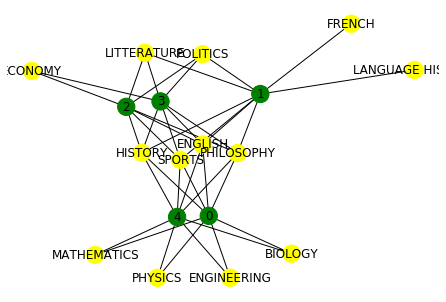

In [47]:
graph = nx.Graph()
for s in subjects:
    graph.add_node(s, color="yellow")
for c in classes:
    graph.add_node(classes.index(c), color="green")
    if c.get("courses") == "ENGINEER":
        for topic in engineer_course:
            graph.add_edge(topic, classes.index(c))
    elif c.get("courses") == "LITTERATURE":
        for topic in litterature_course:
            graph.add_edge(topic, classes.index(c))
    elif c.get("courses") == "ECONOMY":
        for topic in economy_course:
            graph.add_edge(topic, classes.index(c))
colors = [graph.nodes[node].get("color") for node in graph.nodes]
nx.draw(graph, with_labels=True, node_color=colors)

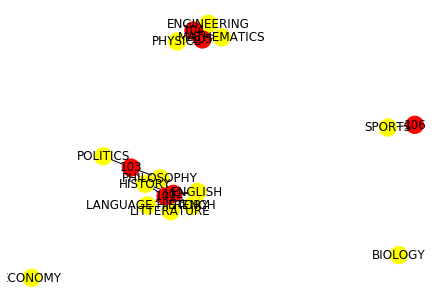

In [48]:
graph = nx.Graph()
for s in subjects:
    graph.add_node(s, color="yellow")
for r in classrooms:
    graph.add_node(r.get("id"), color="red")
    for s in r.get("possible_subjects"):
        graph.add_edge(r.get("id"), s)
colors = [graph.nodes[node].get("color") for node in graph.nodes]
nx.draw(graph, with_labels=True, node_color=colors)